In [1]:
import numpy as np
from dscribe.descriptors import SOAP
from ase.io import read, write

Compute structural descriptors

In [2]:
def compute_features(structures):
    """"""
    soap = SOAP(
        species = ["Si"],
        r_cut = 6.0,
        n_max = 12,
        l_max = 8,
        sigma = 0.2,
        average = "inner",
        periodic = True
    )
    
    return soap.create(structures, n_jobs=6)

In [3]:
init_structures = read("./configuration_map/init_structures.xyz", ":")
init_features = compute_features(init_structures)

In [4]:
iter2_structures = read("./configuration_map/iter2_md-neg10kbar.xyz", ":")
iter2_features = compute_features(iter2_structures)

In [5]:
feature_groups = dict(
    init = init_features,
    iter2 = iter2_features
)

Visualise the Configuration Space

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [7]:
def plot_configuration_space(feature_groups):
    # combine features togather
    features = np.vstack(list(feature_groups.values()))
    reducer = PCA(n_components=2)
    reducer.fit(features)
    #
    for curr_label, curr_features in feature_groups.items():
        proj = reducer.transform(curr_features)
        plt.scatter(
            proj[:, 0], proj[:, 1], alpha=0.5, label=curr_label
        )
    plt.legend()
    
    return

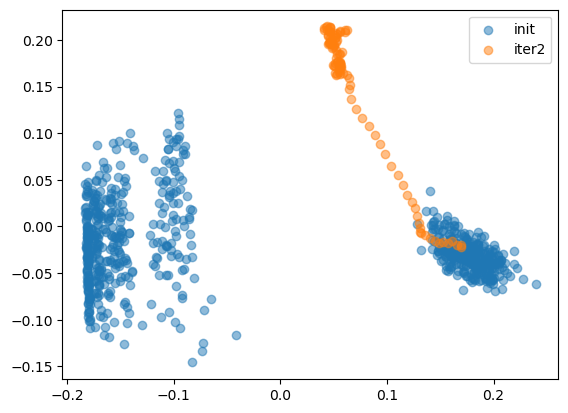

In [8]:
plot_configuration_space(feature_groups)